# Ficha de trabalho 2
Ficheiros a usar: 
* wines.csv - ficheiro com os dados das análises
* wines_labels.csv - labels das classes


**Sumário:**

A data frame containing 177 rows and thirteen columns. These data are the results of chemical analyses of wines grown in the same region in Italy (Piedmont) but derived from three different cultivars (classes).


In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn import preprocessing

1 - Importa os dados presentes nos dois ficheiros.

In [2]:
df1 = pd.read_csv('wines.csv')
df1

,Unnamed: 0,alcohol,malic acid,ash,ash alkalinity,magnesium,tot. phenols,flavonoids,non-flav. phenols,proanth,col. int.,col. hue,OD ratio,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df2 = pd.read_csv('wines_labels.csv')
df2

,Unnamed: 0,x
0,1,Barolo
1,2,Barolo
2,3,Barolo
3,4,Barolo
4,5,Barolo
...,...,...
172,173,Barbera
173,174,Barbera
174,175,Barbera
175,176,Barbera


2 - Explora o dataset, indicando:
 * o número de amostras e atributos, 
 * tipos de dados, 
 * se há valores em falta,
 * principais estatísticas sobre cada variável dos dados (média, mediana, quartis, ...)

In [4]:
print('Dataset wines.csv\n')
print('- data dimensions:\n')
print(str(df1.shape[0]) + ' samples, ' + str(df1.shape[1]) + ' atributes\n')
print('- data types:\n')
print(df1.dtypes)
print('\n- missing values:\n')
print(df1.isnull().sum())
print('\n- statistics:')
df1.describe()

Dataset wines.csv

- data dimensions:

177 samples, 14 atributes

- data types:

Unnamed: 0             int64
alcohol              float64
malic acid           float64
ash                  float64
ash alkalinity       float64
magnesium              int64
tot. phenols         float64
flavonoids           float64
non-flav. phenols    float64
proanth              float64
col. int.            float64
col. hue             float64
OD ratio             float64
proline                int64
dtype: object

- missing values:

Unnamed: 0           0
alcohol              0
malic acid           0
ash                  0
ash alkalinity       0
magnesium            0
tot. phenols         0
flavonoids           0
non-flav. phenols    0
proanth              0
col. int.            0
col. hue             0
OD ratio             0
proline              0
dtype: int64

- statistics:


,Unnamed: 0,alcohol,malic acid,ash,ash alkalinity,magnesium,tot. phenols,flavonoids,non-flav. phenols,proanth,col. int.,col. hue,OD ratio,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,89.000000,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,51.239633,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,45.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,89.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,133.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,177.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
print('Dataset wines_labels.csv\n')
print('- data dimensions:\n')
print(str(df2.shape[0]) + ' samples, ' + str(df2.shape[1]) + ' atributes\n')
print('- data types:\n')
print(df2.dtypes)
print('\n- missing values:\n')
print(df2.isnull().sum())
print('\n- statistics:')
df2.describe()

Dataset wines_labels.csv

- data dimensions:

177 samples, 2 atributes

- data types:

Unnamed: 0     int64
x             object
dtype: object

- missing values:

Unnamed: 0    0
x             0
dtype: int64

- statistics:


,Unnamed: 0
count,177.000000
mean,89.000000
std,51.239633
min,1.000000
25%,45.000000
50%,89.000000
75%,133.000000
max,177.000000


3- Cria sub-conjuntos do dataset original contendo apenas os dados de cada uma das classes.

In [23]:
df = pd.concat([df1, df2])
df_barolo = df1[df2['x'] == 'Barolo']
df_barbera = df1[df2['x'] == 'Barbera']

4 - Verifica se as amostras provenientes das classes "Barolo" e "Barbera" têm níveis de alcool significativamente diferentes. De forma a determinar que tipo de teste estatístico usar, determina se os grupos de valores a comparar seguem ou não a distribuição normal (e.g. usando o teste de Shapiro).

In [26]:
# normality of data by group
print(stats.shapiro(df_barolo['alcohol']))
print(stats.shapiro(df_barbera['alcohol']))
# p-values > 0.05, HO: the data follows a normal distribution, not rejected

stats.ttest_ind(df_barolo['alcohol'], df_barbera['alcohol'])
# HO not rejected, diferent values

ShapiroResult(statistic=0.981652021408081, pvalue=0.5255285501480103)
ShapiroResult(statistic=0.981467604637146, pvalue=0.6408376097679138)


Ttest_indResult(statistic=6.046516305087218, pvalue=2.3479977832012858e-08)

5 - Efectua uma análise semelhante à anterior mas considerando também a classe “Grignolino”. 

In [33]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as multi

mydata = df1.join(df2['x'])
lm = ols("mydata.alcohol~mydata.x", mydata).fit()

print(anova_lm(lm))
# p_value < 0.05, reject HO

print('\n---\n')

mc = multi.MultiComparison(mydata.alcohol, mydata.x)
results = mc.tukeyhsd()
print(results)

             df     sum_sq    mean_sq           F        PR(>F)
mydata.x    2.0  69.514462  34.757231  132.569148  1.050680e-35
Residual  174.0  45.619651   0.262182         NaN           NaN

---

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2   meandiff p-adj  lower   upper  reject
--------------------------------------------------------
Barbera     Barolo   0.5826 0.001  0.3464  0.8188   True
Barbera Grignolino   -0.875 0.001 -1.1012 -0.6488   True
 Barolo Grignolino  -1.4576 0.001 -1.6719 -1.2434   True
--------------------------------------------------------


6- Representa graficamente os dados usados na questão anterior para uma análise gráfica da mesma questão (recomenda-se o uso de boxplots).

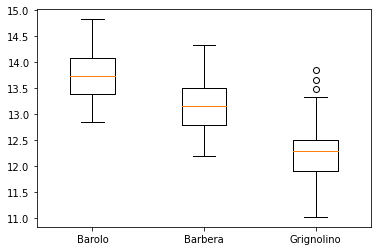

In [35]:
import matplotlib.pyplot as plt 
%matplotlib inline

df_grignolino = df1[df2['x'] == 'Grignolino']

to_plot = [df_barolo['alcohol'], df_barbera['alcohol'], df_grignolino['alcohol']]

plt.boxplot(to_plot, positions = [1, 2, 3], widths = 0.4)
plt.xticks([1,2,3], ['Barolo', 'Barbera', 'Grignolino'])
plt.show()

7- Repete o processo da questão 4 para todas as variáveis do dataset. Qual aquela que tem maior evidência de diferenças entre as duas classes.

In [38]:
res_tt = lambda x : stats.ttest_ind(x[df2['x'] == 'Barbera'], x[df2['x'] == 'Barolo'])

df1.apply(lambda x: res_tt(x)[1])

Unnamed: 0           1.294259e-65
alcohol              2.347998e-08
malic acid           1.667697e-11
ash                  6.450298e-01
ash alkalinity       4.387521e-15
magnesium            1.574579e-03
tot. phenols         6.121123e-32
flavonoids           3.561360e-55
non-flav. phenols    7.194458e-13
proanth              3.718284e-15
col. int.            6.525118e-07
col. hue             2.554995e-31
OD ratio             6.670210e-44
proline              5.968727e-25
dtype: float64